In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

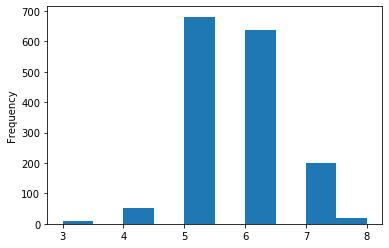

In [19]:
df=df['quality'].plot.hist()
df

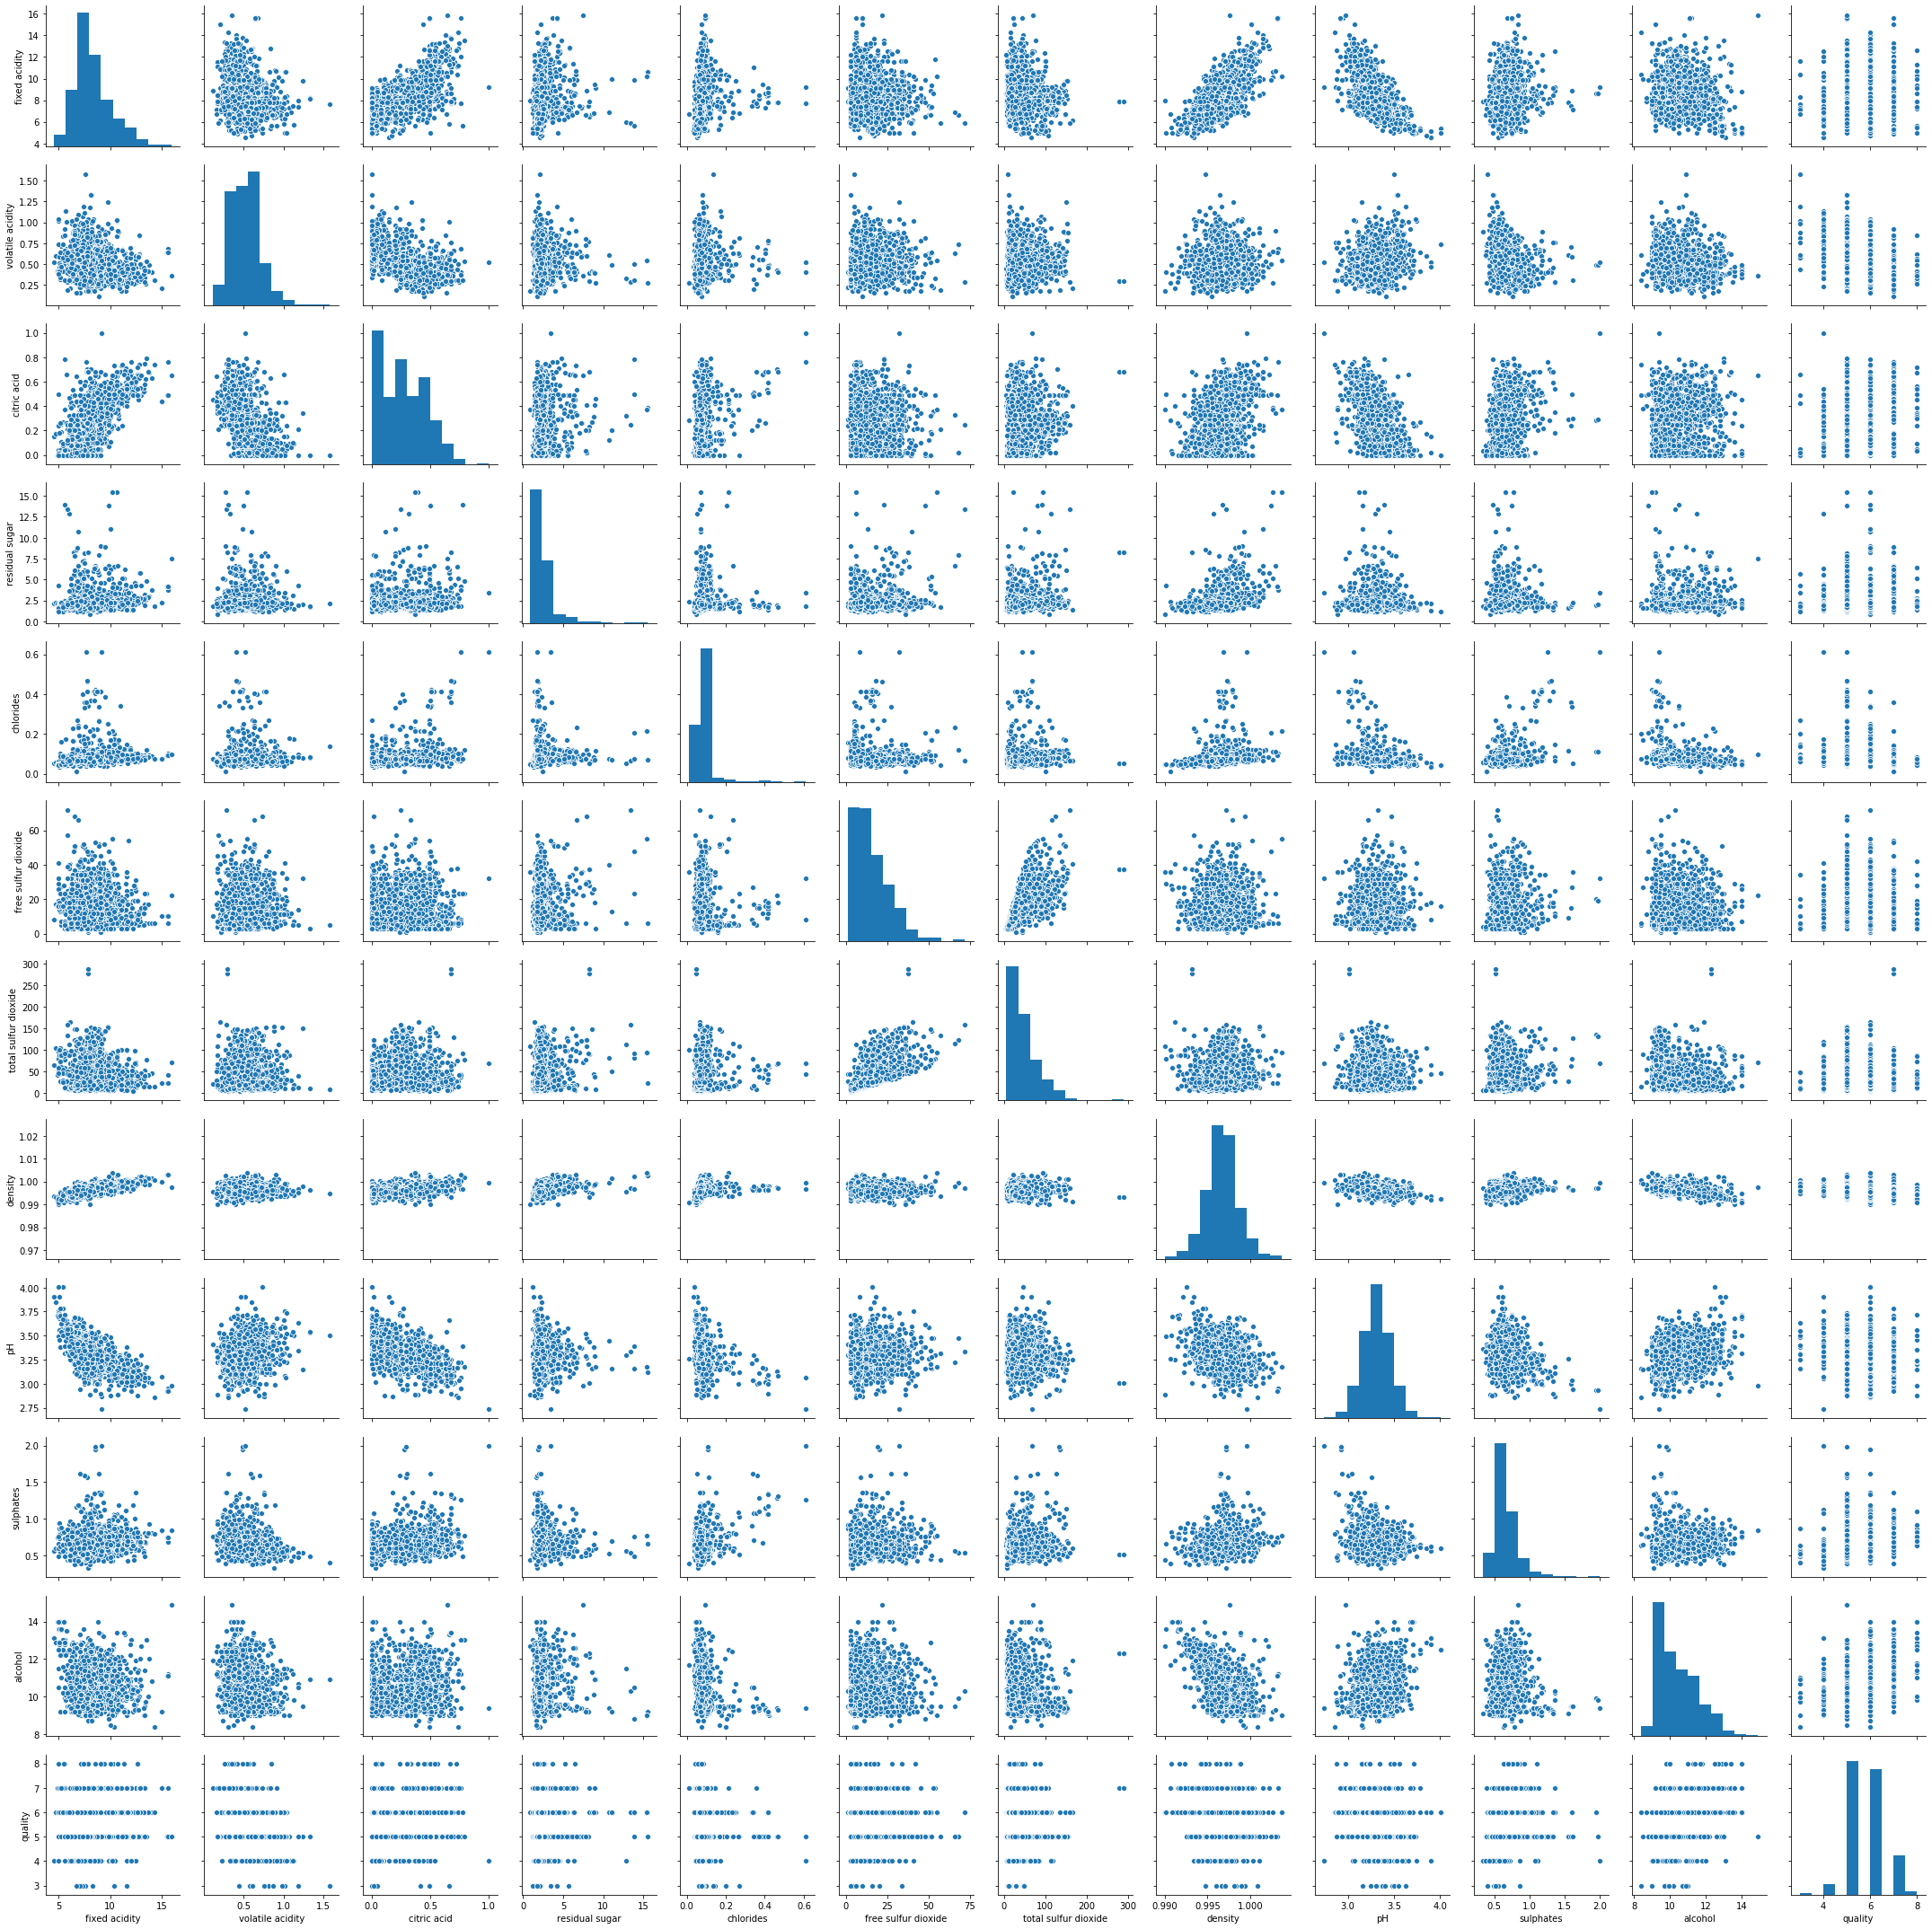

In [6]:
sns.pairplot(df)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.shape

(1599, 12)

In [11]:
from scipy.stats import zscore
z_scr=zscore(df)
df1=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df1.shape)

(1451, 12)


In [12]:
x=df1.iloc[:,:-1]
x.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y=df1['quality']
y.head(2)

0    5
1    5
Name: quality, dtype: int64

In [20]:
df1.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [21]:
for i in x.skew().index:
    if x.skew().loc[i] >0.55:
        x[i]=np.cbrt(x[i])

In [22]:
x.skew()

fixed acidity           0.529105
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.629524
chlorides               1.020246
free sulfur dioxide     0.125799
total sulfur dioxide    0.342621
density                 0.055738
pH                      0.114705
sulphates               0.523901
alcohol                 0.646678
dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    rs=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            rs=r_state
            
    print("max r2 score corresponding to ",rs," is ",max_r_score)
    return rs

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters={"n_neighbors":range(1,40)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 37}

In [42]:
knr=KNeighborsRegressor(n_neighbors=37)
maxr2_score(knr,x,y)

max r2 score corresponding to  73  is  0.41320493615677334


73

In [48]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for  KNN regressor: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN regressor: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for  KNN regressor:  0.29282036617326357
standard deviation in r2 score for KNN regressor:  0.08027482502821706


In [35]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [37]:
svr=SVR(kernel='linear',C=0.01)
maxr2_score(svr,x,y)

max r2 score corresponding to  43  is  0.4379998280237408


43

In [49]:
from sklearn.model_selection import cross_val_score
print("Mean  r2 score for  svr regressor: ",cross_val_score(svr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for svr regressor: ",cross_val_score(svr,x,y,cv=5,scoring="r2").std())

Mean  r2 score for  svr regressor:  0.3297631552530521
standard deviation in r2 score for svr regressor:  0.06834463773266314


In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to  73  is  0.4441027053778829


73

In [50]:
from sklearn.model_selection import cross_val_score
print("Mean  for r2 score linear regression: ",cross_val_score(lr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for linear regression: ",cross_val_score(lr,x,y,cv=5,scoring="r2").std())

Mean  for r2 score linear regression:  0.326267057162306
standard deviation in r2 score for linear regression:  0.07295586402463951


In [45]:
from sklearn.linear_model import Ridge
rg=Ridge()
maxr2_score(rg,x,y)

max r2 score corresponding to  73  is  0.4441334891525983


73

In [51]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for   ridge: ",cross_val_score(rg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ridge: ",cross_val_score(rg,x,y,cv=5,scoring="r2").std())

Mean r2 score for   ridge:  0.32632381625498647
standard deviation in r2 score for KNN regressor:  0.07293903295714663


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf=RandomForestRegressor()
clf = GridSearchCV(rf, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [56]:
rf=RandomForestRegressor(n_estimators=500)
maxr2_score(rf,x,y)

max r2 score corresponding to  51  is  0.589238766168035


51

In [64]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for   randomforest: ",cross_val_score(rf,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for randomforest: ",cross_val_score(rf,x,y,cv=5,scoring="r2").std())

Mean r2 score for   randomforest:  0.3205789970299586
standard deviation in r2 score for randomforest:  0.052089052632803896


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 51,test_size=0.20)
rf_clf=RandomForestRegressor(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [71]:
print("r2_score is: ",r2_score(y_test,y_pred))

r2_score is:  0.5867382586885614


In [69]:
from sklearn.externals import joblib 
joblib.dump(rf, 'wine_dataset_random_forest.pkl')

['wine_dataset_random_forest.pkl']